In [16]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import japanize_matplotlib # 追加


## データの読み込みと確認

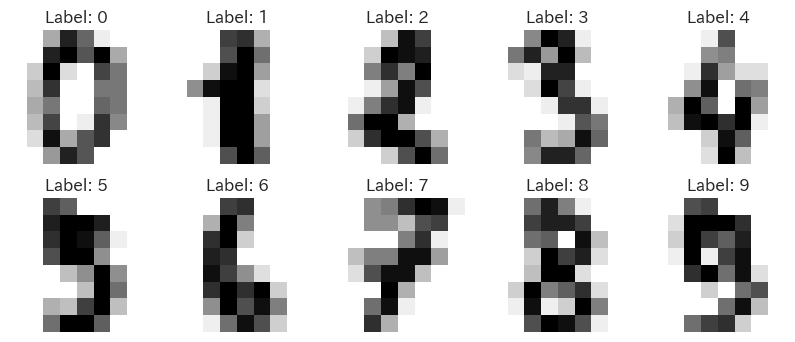

In [19]:
# データセットの読み込み
digits = datasets.load_digits()

# データの可視化
plt.figure(figsize=(10, 4))
for index, (image, label) in enumerate(zip(digits.images[:10], digits.target[:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Label: {label}')
    plt.axis('off')
plt.show()

## 特徴量とラベルからクラス分類

In [7]:
# 特徴量とラベルを取得
X = digits.data  # 8x8ピクセル画像を1次元配列に変換したデータ
y = digits.target

# データをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVMモデルの作成と訓練
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# テストデータで予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy 精度: {accuracy:.2f}")
print("\nClassification Report 各クラスごとの精度指標（Precision, Recall, F1スコア）:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix クラスごとの正解・不正解数:")
print(confusion_matrix(y_test, y_pred))

Accuracy 精度: 0.98

Classification Report 各クラスごとの精度指標（Precision, Recall, F1スコア）:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360


Confusion Matrix クラスごとの正解・不正解数:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  0 

## テスト結果の可視化

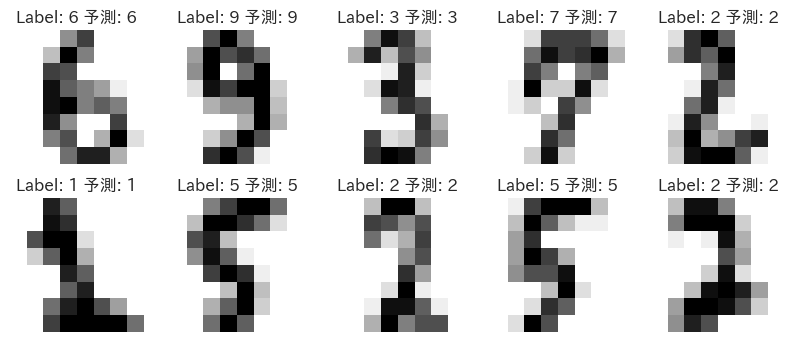

In [18]:
# テスト結果の一部を可視化
plt.figure(figsize=(10, 4))
for index, (image, label, prediction) in enumerate(zip(X_test[:10], y_test[:10], y_pred[:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Label: {label} 予測: {prediction}')
    plt.axis('off')
plt.show()